In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

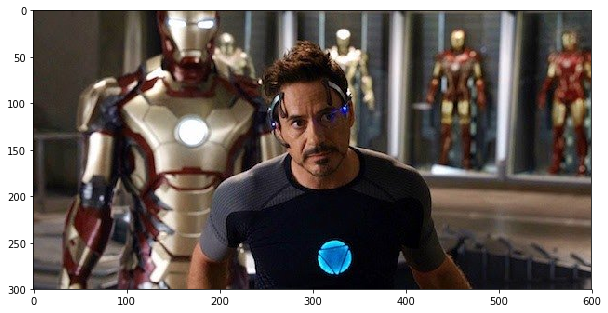

In [7]:
img = cv2.imread( 'C:\\Users\\Administrator\\Desktop\\python\\OpenCV\\4_Object_Detection\\ironman.jpg' )
img = cv2.cvtColor( img , cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10 , 7 ) )
plt.imshow( img )

In [9]:
# generate Gaussian pyramid for img
G = img.copy()
gp_img = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gp_img.append(G)

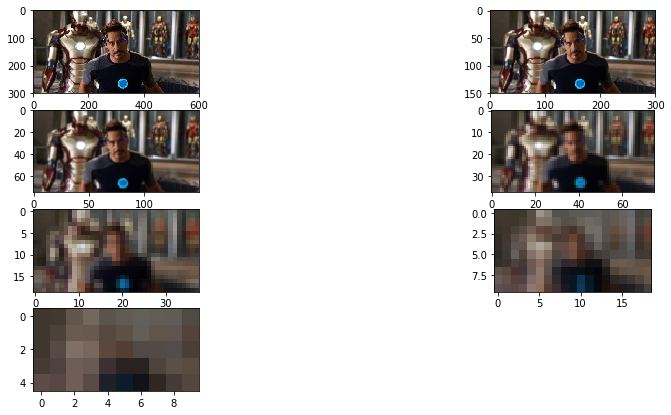

In [14]:
plt.figure(figsize = (15,7))
for i,pic in enumerate( gp_img ):
    plt.subplot( 4 , 2 , i+1)
    plt.imshow(pic)

# Image Blending side by side

In [4]:
A = cv2.imread('apple.jpg')
A = cv2.cvtColor( A , cv2.COLOR_BGR2RGB)

B = cv2.imread('orange.jpg')
B = cv2.cvtColor( B , cv2.COLOR_BGR2RGB)

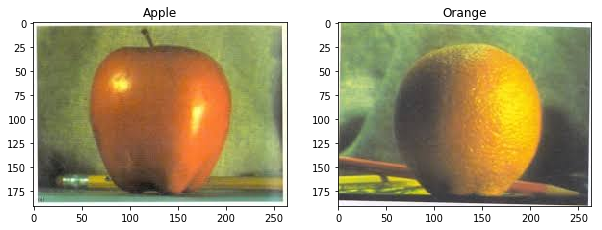

In [6]:
plt.figure(figsize = (10 , 7 ) )
plt.subplot(1,2,1)
plt.title('Apple')
plt.imshow( A )

plt.subplot(1,2,2)
plt.title('Orange')
plt.imshow( B )

# Direct Combine of image by taking half of each image 

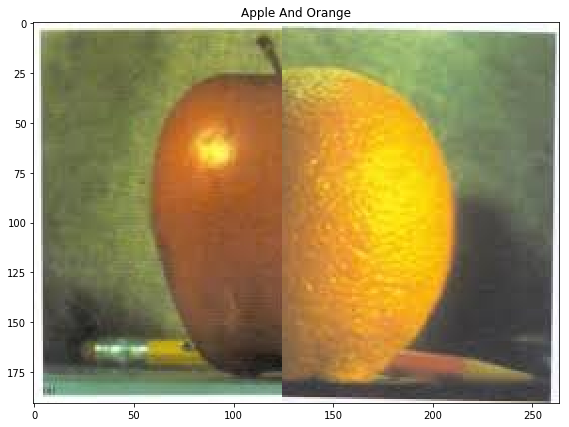

In [10]:
d_combine = np.hstack( (A[: , :125] , B[: , 125:]) )

plt.figure(figsize = (10 , 7 ) )

plt.title('Apple And Orange')
plt.imshow( d_combine )

- The Image didn't look perfect , so use image pyramid method to solve the image

In [12]:
# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpA.append(G)

# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv2.pyrDown(G)
    gpB.append(G)

In [41]:
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    size = ( gpA[i-1].shape[1], gpA[i - 1].shape[0])
    GE = cv2.pyrUp(gpA[i] , dstsize = size )
    L = cv2.subtract(gpA[i-1],GE)
    lpA.append(L)

# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    size = ( gpB[i-1].shape[1], gpB[i - 1].shape[0])
    GE = cv2.pyrUp(gpB[i] , dstsize = size  )
    L = cv2.subtract(gpB[i-1],GE)
    lpB.append(L)

In [43]:
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)

In [49]:
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    size = ( LS[i].shape[1], LS[i].shape[0])
    ls_ = cv2.pyrUp(ls_ , dstsize = size )
    ls_ = cv2.add(ls_, LS[i])


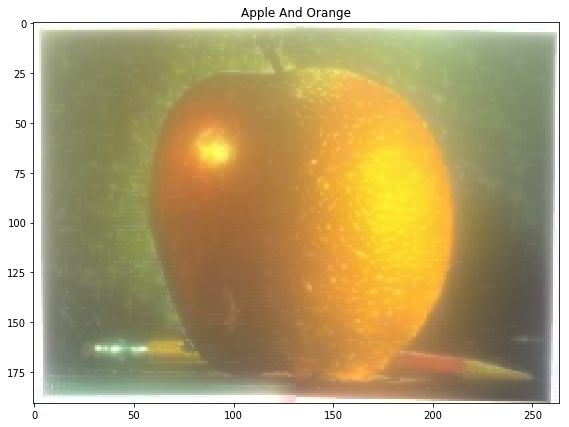

In [50]:
plt.figure(figsize = (10 , 7 ) )

plt.title('Apple And Orange')
plt.imshow( ls_ )

# Image Blending one over another

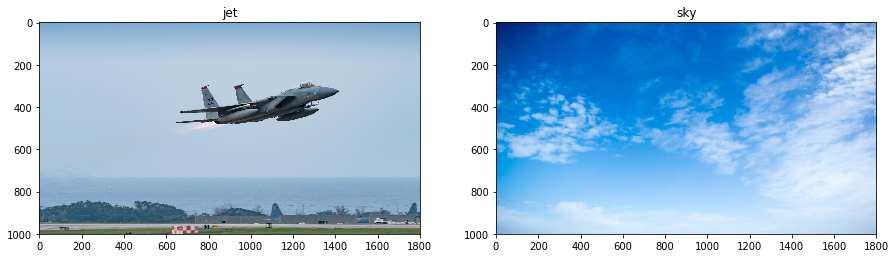

In [52]:
sky = cv2.imread('sky.jpg')
sky = cv2.cvtColor( sky , cv2.COLOR_BGR2RGB)
sky = cv2.resize(sky, (1800, 1000))

jet = cv2.imread('jet.jpg')
jet = cv2.cvtColor( jet , cv2.COLOR_BGR2RGB)
jet = cv2.resize(jet, (1800, 1000))

plt.figure(figsize = (15 , 7 ) )
plt.subplot(1,2,1)
plt.title('jet')
plt.imshow( jet )

plt.subplot(1,2,2)
plt.title('sky')
plt.imshow( sky )

plt.show()

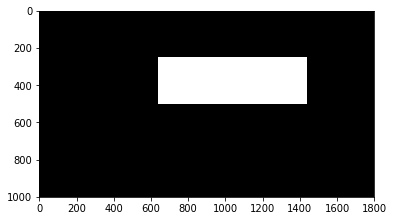

In [77]:
# Create the mask
mask = np.zeros((1000,1800,3), dtype='float32')
mask[250:500,640:1440,:] = (1,1,1)

plt.imshow(mask)                                                                                                                                                                                                                                                                                                                                    

In [78]:
# generate Gaussian pyramid for jet
G_jet = jet.copy()
gp_jet = [G_jet]
for i in range(6):
    G_jet = cv2.pyrDown(G_jet)
    gp_jet.append(G_jet)

# generate Gaussian pyramid for SKy
G_sky = sky.copy()
gp_sky = [G_sky]
for i in range(6):
    G_sky= cv2.pyrDown(G_sky)
    gp_sky.append(G_sky)
    
    
# generate Laplacian Pyramid for jet
lp_jet = [gp_jet[5]]
for i in range(5,0,-1):
    size = ( gp_jet[i-1].shape[1], gp_jet[i - 1].shape[0])
    GE = cv2.pyrUp(gp_jet[i] , dstsize = size )
    L = cv2.subtract(gp_jet[i-1],GE)
    lp_jet.append(L)

# generate Laplacian Pyramid for sky
lp_sky = [gp_sky[5]]
for i in range(5,0,-1):
    size = ( gp_sky[i-1].shape[1], gp_sky[i - 1].shape[0])
    GE = cv2.pyrUp(gp_sky[i] , dstsize = size  )
    L = cv2.subtract(gp_sky[i-1],GE)
    lp_sky.append(L)

In [79]:
# Calculate the Gaussian pyramid for the mask image and reverse it.

G_mask = mask.copy()
gp_mask = [G_mask]
for i in range(6):
    G_mask = cv2.pyrDown(G_mask)
    gp_mask.append(G_mask)
    
# gp_mask.reverse()

In [80]:
# Blend the images
LS = []
for la,lb,mask in zip( gp_sky , gp_jet ,gp_mask):
    ls = lb * mask + la * (1.0 - mask)
    LS.append(ls)

In [87]:
for i in LS:
    print( i.shape )

(1000, 1800, 3)
(500, 900, 3)
(250, 450, 3)
(125, 225, 3)
(63, 113, 3)
(32, 57, 3)
(16, 29, 3)


In [88]:
LS.reverse()

In [89]:
laplacian_top = LS[0]
laplacian_lst = [laplacian_top]
num_levels = len(LS) - 1
for i in range(num_levels):
    size = (LS[i + 1].shape[1], LS[i + 1].shape[0])
    laplacian_expanded = cv2.pyrUp(laplacian_top, dstsize=size)
    laplacian_top = cv2.add(LS[i+1], laplacian_expanded)
    laplacian_lst.append(laplacian_top)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


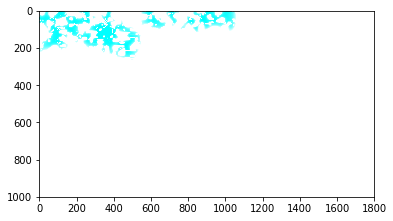

In [90]:
plt.imshow( laplacian_lst[-1] )

In [91]:
# Step-2
# Find the Gaussian pyramid of the two images and the mask
def gaussian_pyramid(img, num_levels):
    lower = img.copy()
    gaussian_pyr = [lower]
    for i in range(num_levels):
        lower = cv2.pyrDown(lower)
        gaussian_pyr.append(np.float32(lower))
    return gaussian_pyr
 
# Step-3
# Then calculate the Laplacian pyramid
def laplacian_pyramid(gaussian_pyr):
    laplacian_top = gaussian_pyr[-1]
    num_levels = len(gaussian_pyr) - 1
    
    laplacian_pyr = [laplacian_top]
    for i in range(num_levels,0,-1):
        size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
        gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
        laplacian = np.subtract(gaussian_pyr[i-1], gaussian_expanded)
        laplacian_pyr.append(laplacian)
    return laplacian_pyr
 
# Step-4
# Now blend the two images wrt. the mask
def blend(laplacian_A,laplacian_B,mask_pyr):
    LS = []
    for la,lb,mask in zip(laplacian_A,laplacian_B,mask_pyr):
        ls = lb * mask + la * (1.0 - mask)
        LS.append(ls)
    return LS
 
# Step-5
# Reconstruct the original image
def reconstruct(laplacian_pyr):
    laplacian_top = laplacian_pyr[0]
    laplacian_lst = [laplacian_top]
    num_levels = len(laplacian_pyr) - 1
    for i in range(num_levels):
        size = (laplacian_pyr[i + 1].shape[1], laplacian_pyr[i + 1].shape[0])
        laplacian_expanded = cv2.pyrUp(laplacian_top, dstsize=size)
        laplacian_top = cv2.add(laplacian_pyr[i+1], laplacian_expanded)
        laplacian_lst.append(laplacian_top)
    return laplacian_lst
 


In [104]:
# Now let's call all these functions
if __name__ == '__main__':
    # Step-1
    # Load the two images
    img1 = cv2.imread('sky2.jpg')
    img1 = cv2.resize(img1, (1800, 1000))
    img1 = cv2.cvtColor( img1 , cv2.COLOR_BGR2RGB)
    img2 = cv2.imread('jet.jpg')
    img2 = cv2.resize(img2, (1800, 1000))
    img2 = cv2.cvtColor( img2 , cv2.COLOR_BGR2RGB)

In [105]:
 
    # Create the mask
mask = np.zeros((1000,1800,3), dtype='float32')
mask[250:500,640:1440,:] = (1,1,1)
    
num_levels = 7
    
    # For image-1, calculate Gaussian and Laplacian
gaussian_pyr_1 = gaussian_pyramid(img1, num_levels)
laplacian_pyr_1 = laplacian_pyramid(gaussian_pyr_1)
    # For image-2, calculate Gaussian and Laplacian
gaussian_pyr_2 = gaussian_pyramid(img2, num_levels)
laplacian_pyr_2 = laplacian_pyramid(gaussian_pyr_2)


In [106]:
    # Calculate the Gaussian pyramid for the mask image and reverse it.
mask_pyr_final = gaussian_pyramid(mask, num_levels)
mask_pyr_final.reverse()


In [107]:
for i in mask_pyr_final:
    print(i.shape)

(8, 15, 3)
(16, 29, 3)
(32, 57, 3)
(63, 113, 3)
(125, 225, 3)
(250, 450, 3)
(500, 900, 3)
(1000, 1800, 3)


In [108]:
    # Blend the images
add_laplace = blend(laplacian_pyr_1,laplacian_pyr_2,mask_pyr_final)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


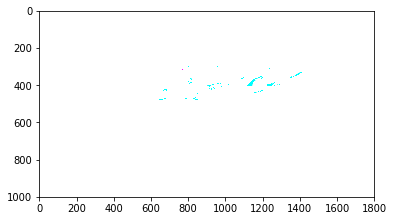

In [109]:
    # Reconstruct the images
final  = reconstruct(add_laplace)
# Save the final image to the disk
plt.imshow(final[num_levels])